In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chat-sentiment-dataset/chat_dataset.csv


In [2]:
df=pd.read_csv("/kaggle/input/chat-sentiment-dataset/chat_dataset.csv")

In [3]:
df.head()

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   message    584 non-null    object
 1   sentiment  584 non-null    object
dtypes: object(2)
memory usage: 9.3+ KB


In [5]:
df["sentiment"].value_counts()

sentiment
neutral     259
positive    178
negative    147
Name: count, dtype: int64

In [6]:
df.drop_duplicates()

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative
...,...,...
579,I have to cancel my vacation plans because I c...,negative
580,My computer crashed and I lost all my importan...,negative
581,I got into a car accident and my car is totale...,negative
582,I have a cold and can't stop coughing. it's re...,negative


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

stop_words=set(stopwords.words("english"))

lemmatizer= WordNetLemmatizer()

def preprocess(text):
    text = text.lower()   # Küçük harfe çevir
    text = re.sub(r'[^\w\s]', '', text)   # Noktalama işaretlerini kaldır
    text = re.sub(r'\d+', '', text)   # Sayıları sil
    tokens = word_tokenize(text)   # Kelimelere ayır
    tokens = [word for word in tokens if word not in stop_words]   # Stopword temizliği
    tokens = [lemmatizer.lemmatize(word) for word in tokens]   # Lemmatization(Kelimeleri köklere ayırmak.)
    text = ' '.join(tokens)   # Tekrar birleştir
    return text.strip() 

df["message"]=df["message"].apply(preprocess)

In [8]:
y=df["sentiment"]
x=df["message"]

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=100)


x=tfidf.fit_transform(x)

In [10]:
df.head()

,message,sentiment
0,really enjoyed movie,positive
1,food terrible,negative
2,im sure feel,neutral
3,service excellent,positive
4,bad experience,negative


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=0.2,random_state=42)

mnb=MultinomialNB(alpha=0.5)

model=mnb.fit(train_x,train_y)

print(model.score(train_x,train_y))
print(model.score(val_x,val_y))

0.8201284796573876
0.7863247863247863


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred=model.predict(val_x)

print(accuracy_score(val_y,y_pred))
print(classification_report(val_y, y_pred))
print(confusion_matrix(val_y, y_pred))

0.7863247863247863
              precision    recall  f1-score   support

    negative       0.93      0.47      0.62        30
     neutral       0.75      0.96      0.85        54
    positive       0.79      0.79      0.79        33

    accuracy                           0.79       117
   macro avg       0.82      0.74      0.75       117
weighted avg       0.81      0.79      0.77       117

[[14 11  5]
 [ 0 52  2]
 [ 1  6 26]]


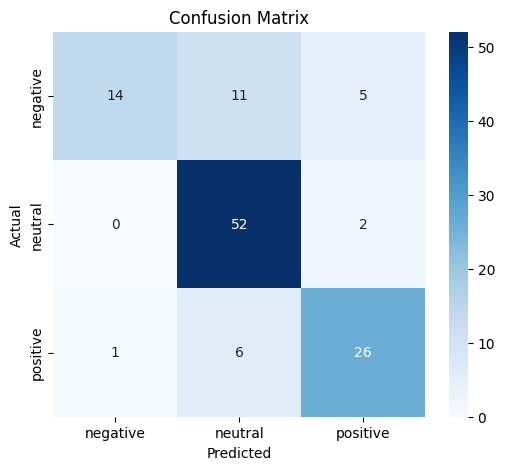

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(val_y, y_pred)


plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative','neutral','positive'], yticklabels=['negative','neutral','positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()